# Recurrent neural network (RNN) from scratch

# What is a recurrent neural network?

A recurrent neural network (RNN), as opposed to a regular fully connected neural network (FCNN), has layers that are connected to themselves.

The difference might be clearer by first looking at an FCNN.

<img src="Figures/fcnn.svg" width="720px" alt="FCNN">

In an FCNN there are no connections between nodes in a single layer. For instance, $h_1^1$ is not connected to $h_2^1$. In addition, the input and output are always of a fixed length.

In an RNN, however, this is no longer the case. Nodes in the hidden layers are connected to themselves, represented by the curved lines in the figure below.

<img src="Figures/rnn.svg" width="400px">

Thus the output $\vec{h}$ from the hidden layer is fed back into the hidden layer. This recurrence makes RNNs useful when working with sequential data, as we can have input of variable length. This is more clear if we unfold the recurrent part of the network.

<img src="Figures/rnn_unfold.svg" width="720px">

# The mathematics of RNNs

## The RNN architecture

Consider some sequential input $X$ with $n$ features. Note that $X$ here is an array with two axes, since it contains $n$ features at each time step in the sequence. We will denote the input at a specific time step $t$ as
$$\vec{X}^{(t)} = \begin{pmatrix}
X^{(t)}_1 \\ \vdots \\ X^{(t)}_n
\end{pmatrix},$$
which is then an $n$-dimensional vector.

Next, consider an RNN with $L$ hidden layers, and an output layer with $m$ features. We will denote the output of the $l$'th hidden layer at time step $t$ as
$$\vec{h}_l^{(t)} = \begin{pmatrix}
h_{l, 1}^{(t)} \\ \vdots \\ h_{l, n_l}^{(t)}
\end{pmatrix},$$
with $n_l$ being the number of features in the $l$'th hidden layer. The output of the RNN at time step $t$ is denoted
$$\hat{\vec{y}}^{(t)} = \begin{pmatrix}
\hat{y}_1 \\ \vdots \\ \hat{y}_m,
\end{pmatrix}$$
where the hat is there to distinguish the RNN output $\hat{\vec{y}}^{(t)}$ from the target value, which is denoted $\vec{y}^{(t)}$.
The RNN will then look like this.

<img src="Figures/large_rnn.svg" width="720px">

## Forward propagation

In order to propagate forward through the network we need some weights and biases to connect the nodes. To simplify the notation going forward, we will consider the input layer to be the *zeroth layer*, and the output layer to be the *$L+1$'th layer*. We need each node to propagate to the node at the next layer (keeping the time step constant), and the next time step (keeping the layer constant), except for the input and output layers which do not connect to each other (as illustrated in the diagram above).

Let $W^{l,l+1}$ be the weight matrix and $\vec{b}^{l,l+1}$ the bias vector, both connecting nodes at the $l$'th layer to the $l+1$'th layer, keeping the time step constant. Next, let $W^{ll}$ be the weight matrix and $\vec{b}^{ll}$ the bias vector, both connecting nodes at subsequent time steps in the same layer. Also, let $\sigma_l$ be the activation function in the $l$'th layer. Lastly, define the weighted sum $\vec{z}_l^{(t)}$ at layer $l$ and time step $t$ such that the output of the node is the activation of that weighted sum, that is, such that $\vec{h}_l^{(t)} = \sigma_l (\vec{z}_l^{(t)})$.

Using these definitions the output from the first hidden layer at the first time step is then
$$ \vec{h}_1^{(1)} = \sigma_1 \left( \vec{z}_1^{(1)} \right), $$
with
$$ \vec{z}_1^{(1)} = W^{01} \vec{X}^{(1)} + \vec{b}^{01}.$$

At later time steps we will also need to consider the contribution from the previous time step. Hence for $t \geq 2$ we will define
$$\left( \vec{z}_1^{(t)} \right)_\text{layer} = W^{01} X^{(t)} + \vec{b}^{01}$$
$$\left( \vec{z}_1^{(t)} \right)_\text{time} = W^{11} \vec{h}_1^{(t-1)} + \vec{b}^{11},$$
such that $\left( \vec{z}_1^{(t)} \right)_\text{layer}$ is the contribution from the previous layer, and $\left( \vec{z}_1^{(t)} \right)_\text{time}$ is the contribution from the previous time step. We then have
$$\vec{z}_1^{(t)} = \left( \vec{z}_1^{(t)} \right)_\text{layer} + \left( \vec{z}_1^{(t)} \right)_\text{time},$$
and
$$\vec{h}_1^{(t)} = \sigma_1 \left( \vec{z}_1^{(t)} \right).$$

The expression is exactly the same for any hidden node, but for $l \geq 2$ we substitute $\vec{X}^{(t)}$ with $\vec{h}_{l-1}^{(t)}$. Thus for the $l$'th layer and $t$'th time step we have
$$ \left( \vec{z}_l^{(t)} \right)_{layer} = W^{l-1,l} \vec{h}_{l-1}^{(t)} + \vec{b}^{l-1,l} $$
and
$$ \left( \vec{z}_l^{(t)} \right)_{time} = W^{ll} \vec{h}_{l}^{(t-1)} + \vec{b}^{ll}, $$
that combine to give
$$ \vec{z}_l^{(t)} = \left( \vec{z}_l^{(t)} \right)_{layer} + \left( \vec{z}_l^{(t)} \right)_{time}, $$
which in turn results in
$$ \vec{h}_l^{(t)} = \sigma_l \left( \vec{z}_l^{(t)} \right). $$
This is also valid at the first time step by setting $\left( \vec{z}_l^{(1)} \right)_\text{time} = 0$.

The expression for the output layer is exactly the same as above, but with $\left( \vec{z}_l^{(t)} \right)_\text{time} = 0$. Thus we have
$$ \vec{z}_{L+1}^{(t)} = \left( \vec{z}_{L+1}^{(t)} \right)_\text{layer} = W^{L,L+1} \vec{h}_L^{(t)} + \vec{b}^{L,L+1} $$
and
$$ \hat{\vec{y}}^{(t)} = \sigma_{L+1} \left( \vec{z}_{L+1}^{(t)} \right) $$

The equations given for the forward propagation can seem a bit messy, so it is nice to have a more visual aid of what is going on. Here is a diagram of the complete RNN including the weights and biases relating the different nodes.

<img src="Figures/feed_forward.svg" width="720px">

And here is a weights and biases connected to a single arbitrary node. The green arrows represent input to the node, and the red arrows represent the output from the node.

<img src="Figures/feed_forward_node.svg" width=300px>

And here is the connections resulting in $\vec{h}_l^{(t)}$ in more detail.

<img src="Figures/activation.svg" width=500px>

## Backpropagation through time (BPTT)

Backpropagation in an RNN works by comparing the output of the network to some target output (just as in the regular neural network), and propagating backwards through both the layers and the *time sequence*. It is therefore commonly referred to as *backpropagation through time* (BPTT). We will now derive the necessary equations to perform BPTT.

We assume that we have propagated forward through the network, and have produced some output $\hat{\vec{y}}^{(t)}$. We want to compare this with some target output value $\vec{y}^{(t)}$, and will do so through a cost function $C \left(\hat{\vec{y}}, \vec{y} \right)$. We will denote the cost at a specific time step $t$ by $C^{(t)} = C^{(t)} \left(\hat{\vec{y}}^{(t)}, \vec{y}^{(t)} \right)$, and the overall cost of the network as $C$.

From the cost function at each time step, we want to compute the gradient with respect to each weight and bias, that is, we want to compute
$$
\frac{\partial C}{\partial W^{l_1 l_2}} \; \text{ and } \; \frac{\partial C}{\partial \vec{b}^{l_1 l_2}}
$$

We will do this one layer at a time, starting at the output layer, and propagating backwards through time in each layer. We assume that we know the gradient of the cost function with respect to the output $\frac{\partial C^{(t)}}{\partial \hat{\vec{y}}^{(t)}}$, and start by finding the gradient with respect to the output weights and biases $W^{L,L+1}$ and $\vec{b}^{L,L+1}$.

### Backpropagation through the output layer

First, we want to find the gradient with respect to $\vec{z}_{L+1}^{(t)}$. The derivative of $C$ with respect to some element $z_{L+1, i}^{(t)}$ of the weighted sum is given by

\begin{align*}
\frac{\partial C}{\partial z_{L+1,i}^{(t)}} &= \frac{\partial C^{(t)}}{\partial z_{L+1,i}^{(t)}}
\\[4ex]
&= \sum_{j=1}^m \frac{\partial C^{(t)}}{\partial \hat{y}_j^{(t)}}  \frac{\partial \hat{y}_j^{(t)}}{\partial z_{L+1,i}^{(t)}}
\\[4ex]
&= \sum_{j=1}^m \frac{\partial C^{(t)}}{\partial \hat{y}_j^{(t)}}  \sigma_{L+1}^\prime \left( z_{L+1,i}^{(t)} \right) \delta_{ij}
\\[4ex]
&= \frac{\partial C^{(t)}}{\partial \hat{y}_i^{(t)}}  \sigma_{L+1}^\prime \left( z_{L+1,i}^{(t)} \right)
\end{align*}

where $\delta_{ij}$ is the Kronecker delta
$\delta_{ij} = \begin{cases}
0, & i \neq j\\
1, & i = j
\end{cases}$, and $\sigma_{L+1}^\prime$ denotes the derivative of the activation function, which we will assume to be known.
we can write this expression more compactly in vector form as
$$
\frac{\partial C}{\partial \vec{z}_{L+1}^{(t)}} = \frac{\partial C^{(t)}}{\partial \hat{\vec{y}}^{(t)}} \odot \sigma_{L+1}^\prime \left( \vec{z}_{L+1}^{(t)} \right),
$$
where $\odot$ denotes the *Hadamard product*, an elementwise multiplication of two vectors/matrices of same size.

---

<u>**Note:**</u> Sometimes the derivatives are real numbers like $\frac{\partial C^{(t)}}{\partial z_{L+1,i}^{(t)}}$, sometimes they are vectors such as $\frac{\partial C^{(t)}}{\partial \vec{z}_{L+1}^{(t)}}$, and sometimes they are matrices. I have not included any explicit notation to explain when they are what, but will assume that this is understood implicitly. A general rule would be to look at whether the expression contains indices like $i,j,k,\ldots$ or not.

<u>**Another note:**</u> There are a lot of indices to keep track of, so to make the notation simpler to follow I will try to follow these rules consistently:
- $l$ = layer index (with $L$ being the final hidden layer). If I need several layer indices I will use $l_1,l_2,\ldots$.
- $(t)$ = time step index.
- $i,j,k$ = vector/matrix elements.
- $n$ = number of input features (length of $\vec{X}$).
- $m$ = number of output features (length of $\hat{\vec{y}}$).
- $n_1,n_2,\ldots$ = number of features in hidden layer number $1,2,\ldots$.

<u>**Third note:**</u> I will not always write the upper bound of summations explicitly, but will assume that this is understood implicitly. For instance, $\sum_j W^{l-1,l}_{ij} h_{l-1,j}$ should be understood to mean $\sum_{j=1}^{n_{l-1}} W^{l-1,l}_{ij} h_{l-1,j}$, such that it sums over all elements of $\vec{h}_{l-1}$.

---

The derivative with respect to the weighted sum will be used a lot during backpropagation, so we will give it its own notation
$$ \vec{\delta}_{L+1}^{(t)} \equiv \frac{\partial C^{(t)}}{\partial \vec{z}_{L+1}^{(t)}} = \frac{\partial C^{(t)}}{\partial \hat{\vec{y}}^{(t)}} \odot \sigma_{L+1}^\prime \left( \vec{z}_{L+1}^{(t)} \right).$$
$\delta_{L+1}^{(t)}$ has one index downstairs (denoting layer), and one index upstairs in parentheses (denoting time step), so don't mix it up with the Kronecker delta $\delta_{ij}$, which I will consistently write with two indices downstairs.

From the delta we can find the cost gradient with respect to the output bias.
Note that the same weights and biases occur several times in the RNN, so we have to sum over each contribution. The cost gradients with respect to the weights and biases in layer $l$ are denoted $\frac{\partial C}{\partial W^{l-1,l}}$, $\frac{\partial C}{\partial W^{ll}}$, $\frac{\partial C}{\partial \vec{b}^{l-1,l}}$ and $\frac{\partial C}{\partial \vec{b}^{ll}}$, and we will denote the contribution at time step $t$ as $\left(\frac{\partial C}{\partial W^{l-1,l}} \right)^{(t)}$, $\left( \frac{\partial C}{\partial W^{ll}} \right)^{(t)}$, $\left( \frac{\partial C}{\partial \vec{b}^{l-1,l}} \right)^{(t)}$ and $\left( \frac{\partial C}{\partial \vec{b}^{ll}} \right)^{(t)}$ such that $\frac{\partial C}{\partial W^{l-1,l}} = \sum_t \left( \frac{\partial C}{\partial W^{l-1,l}}\right)^{(t)}$ and so on.
Using this notation, the gradient with respect to the output bias becomes

\begin{align*}
\left( \frac{\partial C}{\partial b^{L,L+1}_i} \right)^{(t)} &= \sum_{j=1}^m \frac{\partial C}{\partial z_{L+1,j}^{(t)}} \frac{\partial z_{L+1,j}^{(t)}}{\partial b^{L,L+1}_i}
\\[4ex]
&= \sum_{j=1}^m \frac{\partial C}{\partial z_{L+1,j}^{(t)}} \frac{\partial}{\partial b^{L,L+1}_i} \left( \sum_k W^{L,L+1}_{jk} h_{L,k}^{(t)} + b^{L,L+1}_j \right)
\\[4ex]
&= \sum_{j=1}^m \frac{\partial C}{\partial z_{L+1,j}^{(t)}} \delta_{ij}
\\[4ex]
&= \frac{\partial C}{\partial z_{L+1,i}^{(t)}}
\\[4ex]
&= \delta_{L+1,i}^{(t)}.
\end{align*}

Thus on vector form we have
$$ \left( \frac{\partial C}{\partial \vec{b}^{L,L+1}} \right)^{(t)} = \vec{\delta}_{L+1}^{(t)},$$
and finally
$$\frac{\partial C}{\partial \vec{b}^{L,L+1}} = \sum_t \left( \frac{\partial C}{\partial \vec{b}^{L,L+1}} \right)^{(t)}$$

We can also compute the gradient with respect to the output weights

\begin{align*}
\left( \frac{\partial C}{W^{L,L+1}_{ij}} \right)^{(t)} &= \sum_{k_1=1}^m \frac{\partial C}{\partial z_{L+1,k_1}^{(t)}} \frac{\partial z_{L+1,k_1}^{(t)}}{\partial W^{L,L+1}_{ij}}
\\[4ex]
&= \sum_{k_1=1}^m \delta_{L+1,k_1}^{(t)} \frac{\partial}{\partial W^{L,L+1}_{ij}}
\left( \sum_{k_2} W^{L,L+1}_{k_1 k_2} h_{L,k_2}^{(t)} + b^{L,L+1}_{k_1} \right)
\\[4ex]
&= \sum_{k_1=1}^m \delta_{L+1,k_1}^{(t)} \sum_{k_2} h_{L,k_2}^{(t)} \delta_{i k_1} \delta_{j k_2}
\\[4ex]
&= \delta_{L+1,i}^{(t)} h_{L,j}^{(t)}
\\[4ex]
&= \left[ \vec{\delta}_{L+1}^{(t)} \left(\vec{h}_{L}^{(t)}\right)^T \right]_{ij}.
\end{align*}

Thus on vector form we have

$$ \left( \frac{\partial C}{W^{L,L+1}} \right)^{(t)} = \vec{\delta}_{L+1}^{(t)} \left(\vec{h}_{L}^{(t)}\right)^T, $$
and
$$\frac{\partial C}{W^{L,L+1}} = \sum_t \left( \frac{\partial C}{W^{L,L+1}} \right)^{(t)}.$$

Note that we here have an outer product between two vectors, which results in a matrix:

$$
\vec{\delta}_{L+1}^{(t)} \left(\vec{h}_{L}^{(t)}\right)^T
=
\begin{pmatrix}
\delta_{L+1,1}^{(t)} \\ \vdots \\ \delta_{L+1,m}^{(t)}
\end{pmatrix}
\begin{pmatrix}
h_{L,1}^{(t)} & \cdots & h_{L,n_L}^{(t)}
\end{pmatrix}
=
\begin{pmatrix}
\delta_{L+1,1}^{(t)} h_{L,1}^{(t)} & \cdots & \delta_{L+1,1}^{(t)} h_{L,n_L}^{(t)}
\\
\vdots & \ddots & \vdots
\\
\delta_{L+1,m}^{(t)} h_{L,1}^{(t)} & \cdots & \delta_{L+1,m}^{(t)} h_{L,n_L}^{(t)}
\end{pmatrix}
$$

Lastly, we need to compute the gradient with respect to the output from the previous layer $\frac{\partial C}{\partial \vec{h}_L^{(t)}}$, in order to continue backpropagating through previous layers. We find this in much the same way as we found the other gradients above.

\begin{align*}
\frac{\partial C}{\partial h_{L,i}^{(t)}} &= \sum_j \frac{\partial C}{z_{L+1,j}^{(t)}} \frac{\partial z_{L+1,j}^{(t)}}{\partial h_{L,i}^{(t)}}
\\[4ex]
&= \sum_j \delta_{L+1,j}^{(t)} \frac{\partial}{\partial h_{L,i}^{(t)}} \left( \sum_k W^{L,L+1}_{jk} h_{L,k}^{(t)} + b_j^{L,L+1} \right)
\\[4ex]
&= \sum_j \delta_{L+1,j}^{(t)} \sum_k W^{L,L+1}_{jk} \delta_{ik}
\\[4ex]
&= \sum_j \delta_{L+1,j}^{(t)} W^{L,L+1}_{ji}
\\[4ex]
&= \sum_j \left[ \left( W^{L,L+1} \right)^T \right]_{ij} \delta_{L+1,j}^{(t)}
\\[4ex]
&= \left[ \left(W^{L,L+1} \right)^T \vec{\delta}_{L+1}^{(t)} \right]_i
\end{align*}

And thus on vector form we have

$$\frac{\partial C}{\partial \vec{h}_L^{(t)}} = \left( W^{L,L+1} \right)^T \vec{\delta}_{L+1}^{(t)}$$

Here is a diagram showing the backpropagation through the output layer.

<img src="Figures/backprop_output.svg" width=720px>

### Backpropagation through arbitrary node

Consider some arbitrary node in the RNN with output $\vec{h}_l^{(t)}$. Assume you know the total gradient of the cost with respect to this output from the two suceeding nodes
$$
\frac{\partial C}{\partial \vec{h}_l^{(t)}} = \left( \frac{\partial C}{\partial \vec{h}_l^{(t)}} \right)_\text{layer} + \left( \frac{\partial C}{\partial \vec{h}_l^{(t)}} \right)_\text{time}.
$$
We now want to compute the gradients with respect to the weights and biases connecting the two previous nodes to this node, so that we can update these weights and biases when training the network, as well as the gradient with respect to the two previous nodes, so that we can continue backpropagation through the other nodes. The situation is illustrated in the diagram below. The blue arrows show the input gradient from the succeeding nodes, and the red arrows show the gradients we want to compute.

<img src="Figures/backprop_node.svg" width=720px>

The necessary gradients are derived in the same way as for the output layer, so I will simply state the results here. We get the following set of equations for backpropagating through a general node in the RNN.
\begin{align}
\delta_l^{(t)} &= \frac{\partial C}{\partial \vec{h}_l^{(t)}} \odot \sigma_l^\prime \left(\vec{z}_l^{(t)} \right)
\\[4ex]
\left( \frac{\partial C}{\partial \vec{b}^{l-1,l}} \right)^{(t)} = \left( \frac{\partial C}{\partial \vec{b}^{ll}} \right)^{(t)} &= \delta_l^{(t)}
\\[4ex]
\left( \frac{\partial C}{\partial W^{l-1,l}} \right)^{(t)} &= \delta_l^{(t)} \left( \vec{h}_{l-1}^{(t)} \right)^T
\\[4ex]
\left( \frac{\partial C}{\partial W^{ll}} \right)^{(t)} &= \delta_l^{(t)} \left( \vec{h}_l^{(t-1)} \right)^T
\\[4ex]
\frac{\partial C}{\partial \vec{h}_{l-1}^{(t)}} &= \left[ \left( W^{l-1,l} \right)^{(t)} \right]^T \delta_l^{(t)}
\\[4ex]
\frac{\partial C}{\partial \vec{h}_{l}^{(t-1)}} &= \left[ \left( W^{ll} \right)^{(t-1)} \right]^T \delta_l^{(t)},
\end{align}

and
\begin{align}
\frac{\partial C}{\partial \vec{b}^{l-1,l}} &= \sum_t \left( \frac{\partial C}{\partial \vec{b}^{l-1,l}} \right)^{(t)}
\\[4ex]
\frac{\partial C}{\partial \vec{b}^{ll}} &= \sum_t \left( \frac{\partial C}{\partial \vec{b}^{ll}} \right)^{(t)}
\\[4ex]
\frac{\partial C}{\partial W^{l-1,l}} &= \sum_t \left( \frac{\partial C}{\partial W^{l-1,l}} \right)^{(t)}
\\[4ex]
\frac{\partial C}{\partial W^{ll}} &= \sum_t \left( \frac{\partial C}{\partial W^{ll}} \right)^{(t)}.
\end{align}

With this method we can start with the nodes in the output layer, and propagate backwards. The necessary input to one node is the output from backpropagating through the previous node. Thus we can use the equations above recursively, layer by layer, to backpropagate through the entire network.

<img src="Figures/backprop_steps.svg" width=100%>

# The RNN code

Now that we have the mathematical framework, we can develop the code for the RNN.

## Functions

Before we start building a recurrent neural network, we need to define some functions. We need activation functions, cost functions and a way to differentiate these. We also need gradient descent schedulers to update our weights and biases when backpropagating. These functions are defined in this section.

### Activation functions

We want to be able to choose which activation function to use in different layers of the RNN. Here we define some activation functions that can be used by the network. If you have developed a regular fully connected neural network in FYS-STK4155 these functions will probably look very familiar, as they are pretty much copied from those lecture notes. The main difference is that I have used JAX instead of autograd for automatic differentiation. Due to the way JAX vectorizes, I have not gotten gradients with jax to work for softmax, but have included grad_softmax() as its own function.

In [1]:
import numpy as np
import jax.numpy as jnp

def identity(X):
    return X


def sigmoid(X):
    try:
        return 1.0 / (1 + jnp.exp(-X))
    except FloatingPointError:
        return jnp.where(X > jnp.zeros(X.shape), jnp.ones(X.shape), jnp.zeros(X.shape))


def softmax(X):
    X = X - np.max(X, axis=-1, keepdims=True)
    delta = 10e-10
    return np.exp(X) / (np.sum(np.exp(X), axis=-1, keepdims=True) + delta)


def grad_softmax(X):
    f = softmax(X)
    return f - f**2


def RELU(X):
    return jnp.where(X > jnp.zeros(X.shape), X, jnp.zeros(X.shape))


def LRELU(X):
    delta = 10e-4
    return jnp.where(X > jnp.zeros(X.shape), X, delta * X)


def tanh(X):
    return jnp.tanh(X)

### Cost functions

Next, we need to implement the cost functions. We include three cost functions here. The ordinary least squares (OLS) is used for regression problems, and the logistic regression and cross-entropy are used for classification problems.

In [2]:
def CostOLS(target):

    def func(X):
        return (1.0 / target.shape[0]) * jnp.sum((target - X) ** 2)

    return func


def CostLogReg(target):

    def func(X):

        return -(1.0 / target.shape[0]) * jnp.sum(
            (target * jnp.log(X + 10e-10)) + ((1 - target) * jnp.log(1 - X + 10e-10))
        )

    return func


def CostCrossEntropy(target):

    def func(X):
        return -(1.0 / target.size) * jnp.sum(target * jnp.log(X + 10e-10))

    return func

### Automatic differentiation

As mentioned above, we use JAX for automatic differentiation, which is done with the function *grad* in the JAX library. For *grad* to work on a function, it cannot use regular numpy, but must use *jax.numpy*, which is why we imported and used this when defining the activation and cost functions. JAX's numpy is only used for these functions, while we stick with regular numpy for everything else. 

The RELU and leaky RELU activation functions are not continuously differentiable, so we will handle these explicitly in our code.

In [3]:
from jax import grad

def derivate(func):
    if func.__name__ == "RELU":

        def func(X):
            return jnp.where(X > 0, 1, 0)

        return func

    elif func.__name__ == "LRELU":

        def func(X):
            delta = 10e-4
            return jnp.where(X > 0, 1, delta)

        return func

    else:
        return grad(func)


Note that the *grad* function is not, in itself, vectorized. This means that if we send in an array to a function that has been differentiated, JAX will treat this as a function with an array as input, not as a function treating each element individually. This is better understood with an example.

Consider the function $f(x)=x^2$, with derivative $f^\prime (x)=2x$. With JAX we get this with

In [4]:
def f(x):
    return x**2

df = grad(f)

This works if we input a scalar value

In [5]:
x = 2.0
print(df(x))

4.0


But if we try to input an array of values we get an error message.

In [6]:
x = np.linspace(0, 3, 10)

try:
    print(df(x))
except TypeError as msg:
    print(f"Error message: {msg}")

Error message: Gradient only defined for scalar-output functions. Output had shape: (10,).


This is because JAX does not treat each element in $x$ individually. To get around this we can use the *vmap* function in the JAX library, which vectorizes the function.

In [7]:
from jax import vmap
df = vmap(grad(f))
x = np.linspace(0, 3, 10)
print(df(x))

[0.        0.6666667 1.3333334 2.        2.6666667 3.3333333 4.
 4.6666665 5.3333335 6.       ]


Note that *vmap* only vectorizes along one dimension. So if the input array contains several axes, we have to apply *vmap* for each axis.

In [8]:
df = vmap(vmap(vmap(grad(f))))
x = np.linspace(0,3, 27).reshape((3,3,3))
print(df(x))

[[[0.         0.23076923 0.46153846]
  [0.6923077  0.9230769  1.1538461 ]
  [1.3846154  1.6153846  1.8461539 ]]

 [[2.0769231  2.3076923  2.5384614 ]
  [2.7692308  3.         3.2307692 ]
  [3.4615386  3.6923077  3.9230769 ]]

 [[4.1538463  4.3846154  4.6153846 ]
  [4.8461537  5.076923   5.3076925 ]
  [5.5384617  5.769231   6.        ]]]


This approach is tedious, yes, but as far as I know it is the only way to make JAX differentiate elementwise. If you find a simpler work-around, feel free to share with the professor or the group teachers so these notes can be updated.

### Schedulers

We also want to be able to choose which method we want to use for gradient descent when training the RNN. This is done by using a scheduler defined below. These schedulers are identical to the ones used in FYS-STK4155.

In [9]:
class Scheduler:
    """
    Abstract class for Schedulers
    """

    def __init__(self, eta):
        self.eta = eta

    # should be overwritten
    def update_change(self, gradient):
        raise NotImplementedError

    # overwritten if needed
    def reset(self):
        pass


class Constant(Scheduler):
    def __init__(self, eta):
        super().__init__(eta)

    def update_change(self, gradient):
        return self.eta * gradient

    def reset(self):
        pass


class Momentum(Scheduler):
    def __init__(self, eta: float, momentum: float):
        super().__init__(eta)
        self.momentum = momentum
        self.change = 0

    def update_change(self, gradient):
        self.change = self.momentum * self.change + self.eta * gradient
        return self.change

    def reset(self):
        pass


class Adagrad(Scheduler):
    def __init__(self, eta):
        super().__init__(eta)
        self.G_t = None

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        if self.G_t is None:
            self.G_t = np.zeros((gradient.shape[0], gradient.shape[0]))

        self.G_t += gradient @ gradient.T

        G_t_inverse = 1 / (
            delta + np.sqrt(np.reshape(np.diagonal(self.G_t), (self.G_t.shape[0], 1)))
        )
        return self.eta * gradient * G_t_inverse

    def reset(self):
        self.G_t = None


class AdagradMomentum(Scheduler):
    def __init__(self, eta, momentum):
        super().__init__(eta)
        self.G_t = None
        self.momentum = momentum
        self.change = 0

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        if self.G_t is None:
            self.G_t = np.zeros((gradient.shape[0], gradient.shape[0]))

        self.G_t += gradient @ gradient.T

        G_t_inverse = 1 / (
            delta + np.sqrt(np.reshape(np.diagonal(self.G_t), (self.G_t.shape[0], 1)))
        )
        self.change = self.change * self.momentum + self.eta * gradient * G_t_inverse
        return self.change

    def reset(self):
        self.G_t = None


class RMS_prop(Scheduler):
    def __init__(self, eta, rho):
        super().__init__(eta)
        self.rho = rho
        self.second = 0.0


    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero
        self.second = self.rho * self.second + (1 - self.rho) * gradient * gradient
        return self.eta * gradient / (np.sqrt(self.second + delta))

    def reset(self):
        self.second = 0.0


class Adam(Scheduler):
    def __init__(self, eta, rho, rho2):
        super().__init__(eta)
        self.rho = rho
        self.rho2 = rho2
        self.moment = 0
        self.second = 0
        self.n_epochs = 1

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero
        self.moment = self.rho * self.moment + (1 - self.rho) * gradient
        self.second = self.rho2 * self.second + (1 - self.rho2) * gradient * gradient

        moment_corrected = self.moment / (1 - self.rho**self.n_epochs)
        second_corrected = self.second / (1 - self.rho2**self.n_epochs)

        return self.eta * moment_corrected / (np.sqrt(second_corrected + delta))

    def reset(self):
        self.n_epochs += 1
        self.moment = 0
        self.second = 0

## The RNN

We will now implement the code for the RNN. The network will be object-oriented, consisting of the following classes:

- *RNN*: The complete network, consisting of several *Layer* objects.
- *Layer*: Abstract class containing information that is shared across the different types of layers. It is the parent class of the following:
    - *InputLayer*: Layer containing the input to the network. Does not contain any weights and biases.
    - *RNNLayer*: The recurrent layer consisting of nodes in sequence.
    - *OutputLayer*: Recurrent layer for output. Similar to RNNLayer, but does not have any connections between the nodes, only to the nodes at the same time step in the previous layer.
    - *DenseLayer*: Fully connected layer, used to switch from a recurrent network to a regular fully connected network. Especially used for non-sequential output, for instance in classification where you want to classify the entire sequence with a single output.
- *Node*: Contains information about a single node. This is where all the math of forward- and backpropagation takes place.

In our code we want to be able to input batches of values, so that we can feed forward (and backpropagate) many inputs at once. The input to our network will therefore be an array with three axes:

- The input axis, separating the different inputs in the batch.
- The sequence axis, separating the different time steps of the sequence.
- The feature axis, separating the different features of the input (the vector elements).

This input is fed forward through the network, thus each layer has the same three axes. Within the layers, we separate each time step into their own node, thus the nodes only have two axes: the input and feature axes.

Since the RNN class is dependent on the Layer classes, and the Layer classes are dependent on the Node class, we will build the network from the down up, starting with the Node class.

### The Node class

The Node class takes care of the math discussed in the sections [Forward propagation](#forward-propagation) and [Backpropagation through arbitrary node](#backpropagation-through-arbitrary-node). I restate the relevant equations below.

<p align=center><u>Forward propagation:</u></p>

\begin{align*}
\left( \vec{z}_l^{(t)} \right)_{layer} &= W^{l-1,l} \vec{h}_{l-1}^{(t)} + \vec{b}^{l-1,l}
\\[4ex]
\left( \vec{z}_l^{(t)} \right)_{time} &= W^{ll} \vec{h}_{l}^{(t-1)} + \vec{b}^{ll}
\\[4ex]
\vec{z}_l^{(t)} &= \left( \vec{z}_l^{(t)} \right)_{layer} + \left( \vec{z}_l^{(t)} \right)_{time}
\\[4ex]
\vec{h}_l^{(t)} &= \sigma_l \left( \vec{z}_l^{(t)} \right)
\end{align*}

<p align=center><u>Backpropagation:</u></p>

\begin{align*}
\frac{\partial C}{\partial \vec{h}_l^{(t)}} &= \left( \frac{\partial C}{\partial \vec{h}_l^{(t)}} \right)_\text{layer} + \left( \frac{\partial C}{\partial \vec{h}_l^{(t)}} \right)_\text{time}
\\[4ex]
\delta_l^{(t)} &= \frac{\partial C}{\partial \vec{h}_l^{(t)}} \odot \sigma_l^\prime \left(\vec{z}_l^{(t)} \right)
\\[4ex]
\left( \frac{\partial C}{\partial \vec{b}^{l-1,l}} \right)^{(t)} = \left( \frac{\partial C}{\partial \vec{b}^{ll}} \right)^{(t)} &= \delta_l^{(t)}
\\[4ex]
\left( \frac{\partial C}{\partial W^{l-1,l}} \right)^{(t)} &= \delta_l^{(t)} \left( \vec{h}_{l-1}^{(t)} \right)^T
\\[4ex]
\left( \frac{\partial C}{\partial W^{ll}} \right)^{(t)} &= \delta_l^{(t)} \left( \vec{h}_l^{(t-1)} \right)^T
\\[4ex]
\frac{\partial C}{\partial \vec{h}_{l-1}^{(t)}} &= \left[ \left( W^{l-1,l} \right)^{(t)} \right]^T \delta_l^{(t)}
\\[4ex]
\frac{\partial C}{\partial \vec{h}_{l}^{(t-1)}} &= \left[ \left( W^{ll} \right)^{(t-1)} \right]^T \delta_l^{(t)}.
\end{align*}

---

<u>**Note:**</u> The input and output from a node are two-dimensional arrays, with different inputs along the first axis, and the features along the second axis. The equations we have derived for computing forward- and backpropagation assume that we are working with column vectors, but when performing matrix multiplication with these two-dimensional arrays we are in practice working with row vectors. This has to be taken into account in our code.

Consider, for instance, multiplying some weight matrix $W$ with a vector $\vec{h}$. The way we have derived the equations this will look like

$$
W\vec{h} = \begin{pmatrix}
W_{11} & \cdots & W_{1n}\\
\vdots & \ddots & \vdots\\
W_{m1} & \cdots & W_{mn}
\end{pmatrix} \begin{pmatrix}
h_1 \\ \vdots \\ h_n
\end{pmatrix}.
$$

In the code, however, this will look like

$$
\vec{h} W = \begin{pmatrix}
h_{11} & \cdots & h_{1n}\\
\vdots & \ddots & \vdots\\
h_{N1} & \cdots & h_{Nn}
\end{pmatrix} \begin{pmatrix}
W_{11} & \cdots & W_{1m}\\
\vdots & \ddots & \vdots\\
W_{n1} & \cdots & W_{nm}
\end{pmatrix},
$$

where $N$ is the number of inputs. Note that $W$ and $\vec{h}$ have switched places in the matrix multiplication, and that $W$ is essentially a transpose of the corresponding $W$ in the previous case (since we are multiplying the columns with the $\vec{h}$-vectors, instead of the rows).

This is not a big difference, but can be taken into account by reversing the order of some of the matrix multiplications. The full set of changes that must be done to account for this are listed here:

$$
\begin{align}
W \vec{h} \to \vec{h} W \\
\vec{\delta} \vec{h}^T \to \vec{h}^T \vec{\delta}\\
W^T \vec{\delta} \to \vec{\delta} W^T,
\end{align}
$$

and are taken care of in the code below.

---

In [10]:
from collections.abc import Callable # Used for type hints of functions

class Node:
    """
    Single node in the RNN. Computes forward propagation through a single node, stores the output of as a vector (1D array) of length 'n_features'. This class also computes the backpropagation through the node, and stores all the relevant gradients.

    Attributes
    ----------
    n_features (int)
        Number of features in this node (the length of the vector).
    act_func (Callable)
        The activation function of this node.
    {b/W}_{layer/time} (ndarray)
        Bias(b) or weight matrix (W) for computing the contribution to this node from the node in the previous layer/time step.
    h_{layer/time/output} (ndarray)
        The output of the node in the previous layer/time step, or the output of this node.
    z_output (ndarray)
        The weighted sum output of this node (the output before activation).
    grad_{b/W/h}_{layer/time} (ndarray)
        The gradient of the cost function with respect to the appropriate variable.
    """
    def __init__(
            self,
            n_features: int,
            act_func: Callable[[np.ndarray], np.ndarray] = identity,
            W_layer: np.ndarray = None,
            b_layer: np.ndarray = None,
            W_time: np.ndarray = None,
            b_time: np.ndarray = None
    ):
        """
        Constructor for Node objects.

        Parameters
        ----------
        n_features (int)
            Number of features in this node (the length of the vector).
        act_func (Callable)
            The activation function of this node.
        {b/W}_{layer/time} (ndarray)
            Bias(b) or weight matrix (W) for computing the contribution to this node from the node in the previous layer/time step.
        """
        self.n_features = n_features
        self.act_func = act_func
        self.W_layer = W_layer
        self.b_layer = b_layer
        self.W_time = W_time
        self.b_time = b_time

        ## Values from feed_forward()
        self.h_layer = None # h from previous layer
        self.h_time = None # h from previous time step
        self.z_output = None # z for this node
        self.h_output = None # h from this node

        ## Values from backpropagate()
        self.grad_b_layer = None
        self.grad_b_time = None
        self.grad_W_layer = None
        self.grad_W_time = None
        self.grad_h_layer = None
        self.grad_h_time = None
    
    def set_Wb(
            self,
            W_layer: np.ndarray,
            b_layer: np.ndarray,
            W_time: np.ndarray = None,
            b_time: np.ndarray = None
    ):
        """
        Sets the weights and biases to specific values. Used by the layer classes to ensure all nodes have correct weights and biases.

        Parameters
        ----------
        {b/W}_{layer/time} (ndarray)
            Bias(b) or weight matrix (W) for computing the contribution to this node from the node in the previous layer/time step.
        """
        self.W_layer = W_layer
        self.b_layer = b_layer
        self.W_time = W_time
        self.b_time = b_time

    def feed_forward(
            self,
            h_layer: np.ndarray,
            h_time: np.ndarray = None
    ) -> np.ndarray:
        """
        Computes the output of this node from the output of the nodes at the previous layer and time step, using the equations for forward propagation.

        Parameters
        ----------
        h_{layer/time/output} (ndarray)
            The output of the node in the previous layer/time step.
        
        Returns
        -------
        h_output (ndarray)
            The output of this node.
        """
        ## Save h_layer and h_time for use in backpropagation
        self.h_layer = h_layer
        self.h_time = h_time

        num_inputs = h_layer.shape[0]

        ## Compute weighted sum z for this node.
        z_layer = h_layer @ self.W_layer + self.b_layer # Dimension example: (100,5)@(5,7) + (7) = (100,7)

        if h_time is None:
            # This node is at the first time step, thus not receiving any input from previous time steps.
            z_time = np.zeros((num_inputs, self.n_features))
        else:
            z_time = h_time @ self.W_time + self.b_time
        
        self.z_output = z_layer + z_time # Save the weighted sum in the node

        ## Compute activation of the node
        h_output = self.act_func(self.z_output)

        self.h_output = h_output # Save the output in the node
        return h_output # Return output
        

    def backpropagate(
            self,
            dC_layer: np.ndarray = None,
            dC_time: np.ndarray = None,
            lmbd: float = 0.01
    ):
        """
        Performs backpropagation through this node. Computes the gradient of the cost function with respect to the weights and biases of this layer (and stores these gradients so the weights and biases can be updated in the layer object this node belongs to), and the gradient with respect to the output of the nodes in the previous layer and time step (and stores these as well for further backpropagation through the network).

        Parameters
        ----------
        dC_{layer/time} (ndarray)
            Contribution of cost gradient w.r.t. this node from node at next layer/time.
        lmbd (float)
            Regularization parameter for finding the cost gradient with respect to the weights.
        """
        n_batches = self.h_output.shape[0]
        
        ## Total gradient is the sum of the gradient from "next" layer and time
        if dC_time is None:
            # If this is the last node in the layer, the gradient is just the gradient from the next layer
            dC = dC_layer
        elif dC_layer is None:
            # If the next layer has no node at this time step (because it is a SingleOutputLayer), use only dC_time
            dC = dC_time
        else:
            dC = dC_layer + dC_time
        
        ## delta (gradient of cost w.r.t. z)
        if self.act_func.__name__ == "softmax":
            grad_act = grad_softmax(self.z_output)
        else:
            grad_act = vmap(vmap(derivate(self.act_func)))(self.z_output) # vmap is necessary for jax to vectorize gradient properly
        
        delta = grad_act * dC # Hadamard product, i.e., elementwise multiplication

        ## Gradients w.r.t. bias
        self.grad_b_layer = np.sum(delta, axis=0) / n_batches
        self.grad_b_time = np.sum(delta, axis=0) / n_batches

        ## Gradients w.r.t. weights
        self.grad_W_layer = self.h_layer.T @ delta / n_batches
        self.grad_W_layer = self.grad_W_layer + self.W_layer * lmbd # Regularization factor
        
        if self.h_time is None:
            self.grad_W_time = None
        else:
            self.grad_W_time = self.h_time.T @ delta / n_batches
            self.grad_W_time = self.grad_W_time + self.W_time * lmbd # Regularization factor

        ## Gradients w.r.t. input from previous nodes
        # Need to not transpose delta in order for matrices to match up correctly, since we have batches along rows, and features along columns
        self.grad_h_layer = delta @ self.W_layer.T
        if self.h_time is None:
            self.grad_h_time = None
        else:
            self.grad_h_time = delta @ self.W_time.T

### The Layer class

The RNN consists of several layers of various types. The Layer class is an abstract class keeping track of attributes and methods that are common for the different types of layers. We define this class for better organization of the different layers, but it should never be used by itself, for instance by creating a Layer object. You will notice that most of the Layer methods are only declared, not implemented. These methods will vary between layer types, and are implemented in the Layer's child classes, although the Layer class gives a nice overview of which methods to expect from its children.

In [11]:
from __future__ import annotations # Necessary to create typing hint of Layer within the class Layer

class Layer:
    """
    Abstract class for layers. The attributes given here are the attributes that are common to all layers, but they will also contain other attributes in addition to these.

    Attributes
    ----------
    n_features (int)
        Number of features in the nodes of this layer (the length of the vectors).
    seed (int)
        Seed for random number generating with numpy.
    nodes (list)
        List containing all the nodes of the layer in sequence, such that nodes[0] is the node at the first time step, nodes[1] at the second time step, and so on.
    n_nodes (int)
        Number of nodes in the layer. Is updated when adding or removing nodes.
    """
    def __init__(
            self,
            n_features: int,
            seed: int = 100
    ):
        """
        Constructor to be called from child classes.

        Parameters
        ----------
        n_features (int)
            Number of features in the nodes of this layer (the length of the vectors).
        seed (int)
            Seed for random number generating with numpy.
        """
        self.n_features = n_features
        self.seed = seed
        self.nodes = []
        self.n_nodes = 0
    
    def reset_weights(self):
        pass
    
    def reset_schedulers(self):
        pass
    
    def update_weights_all_nodes(self):
        raise NotImplementedError
    
    def add_node(self):
        raise NotImplementedError
    
    def remove_nodes(self):
        """
        Remove all the nodes created for this layer.

        NOTE
        ----
        The weights and biases of the nodes are still stored in the layer, so we can easily
        create new nodes. Removing the nodes is used to allow the sequence length to vary with
        each call of feed_forward().
        """
        self.nodes = []
        self.n_nodes = 0

    def feed_forward(
            self,
            prev_layer: Layer
    ):
        raise NotImplementedError
    
    def backpropagate(
            self,
            next_layer: Layer,
            lmbd: float
    ):
        raise NotImplementedError

### The InputLayer class

When we want to feed forward through an RNN, we will send a 3-dimensional array of shape (batch size, sequence length, number of features) as input. We then want to feed forward through the first hidden layer by computing the output of each node separately.
Each node should then get information from the node at the previous time step, and the node at the previous layer. The way we implement forward propagation in this notebook, we need the previous layer to contain one node for each time step, and feed forward through these nodes.
To make sure this also works for the first hidden layer, we include the InputLayer class, which takes the 3-dimensional input array to the network, and stores the value at each time step as 2-dimensional arrays in separate nodes. For all subsequent layers, we can then send in the previous layer as input to the feed_forward() method, work with each node separately.

Note that feed_forward() will take a layer class as input for all other layers, but since this is the first layer (with no preceding layer), it will instead take in the 3-dimensional input array.

In [12]:
class InputLayer(Layer):
    """
    The input layer of the RNN, used for storing the input to the RNN in nodes for easy forward propagation through subsequent layers.
    This class does not contain any weights or biases, nor does it implement backpropagation as there are no parameters to update.
    InputLayer is the only class that can function as the first layer in the RNN, and it should only be used for this purpose.

    Attributes
    ----------
    n_features (int)
        Number of features in the nodes of this layer (the length of the vectors).
    seed (int)
        Seed for random number generating with numpy.
    nodes (list)
        List containing all the nodes of the layer in sequence, such that nodes[0] is the node at the first time step, nodes[1] at the second time step, and so on.
    n_nodes (int)
        Number of nodes in the layer. Is updated when adding or removing nodes.
    """
    def __init__(
            self,
            n_features: int,
            seed: int = 100
    ):
        """
        Constructor for InputLayer objects.

        Parameters
        ----------
        n_features (int)
            Number of features in the nodes of this layer (the length of the vectors).
        seed (int)
            Seed for random number generating with numpy.
        """
        super().__init__(n_features, seed)
    
    def add_node(self):
        """
        Add a node. Weights and biases are set to None, and activation to identity by default,
        as none of these are relevant for the input layer.
        """
        new_node = Node(self.n_features) # Activation and weights are not used for the input layer
        self.nodes.append(new_node)
        self.n_nodes += 1

    def feed_forward(
            self,
            X: np.ndarray
    ):
        """
        Feed forward through the layer. As this is the input layer, this amounts to adding nodes and setting the output of each node to the value of the input at the corresponding time step. Also checks that the number of features of the input is the same as the layer expects it to be.

        Parameters
        ----------
        X (ndarray)
            Input to the RNN, and thus to this layer. X has shape (batch size, sequence length, number of features)
        
        NOTE
        ----
        Unlike the other layers, this layer takes a numpy array as input instead of a Layer, since it is the first layer.
        """
        X_shape = X.shape
        sequence_length = X_shape[1]
        
        if not self.n_features == X_shape[2]:
            # Input must have the same number of features as defined by the layer
            raise ValueError(f"Expected the number of features in the input layer to be {self.n_features}, got {X_shape[2]}.")
        
        # Add a node to the layer for each time step, and set output
        self.remove_nodes()
        for i in range(sequence_length):
            self.add_node()
            self.nodes[i].h_output = X[:,i,:]

### The RNNLayer class

The RNNLayer class represents the recurrent layers in the RNN. It takes the value at each time step in the preceding layer and computes the output from each node in its own layer, propagating forward through each node one by one, taking into account both the connections between the layers and the time steps. The math behind forward- and backpropagation are already taken care of by the Node class, so the RNN class is actually quite simple.
In forward propagation, it simply goes through each node, inserts the output from the nodes at the previous layer and time step, and lets the nodes themselves do the rest, including storing the results. In backpropagation it goes through each node in reversed order, inserts the gradient of the cost function with respect to their output, lets the nodes calculate the gradients with respect to weights and biases, and then uses these to update the weights and biases of the layer.

In [13]:
from copy import copy
 
class RNNLayer(Layer):
    """
    The recurrent layer of the RNN. Computes forward- and backpropagation through a recurrent layer by feeding forward, or backpropagating, through each
    node of the layer one at a time in sequence.

    Attributes
    ----------
    n_features (int)
        Number of features in the nodes of this layer (the length of the vectors).
    n_features_prev (int)
        Number of features in the nodes of the preceding layer (the length of the vectors).
    seed (int)
        Seed for random number generating with numpy.
    nodes (list)
        List containing all the nodes of the layer in sequence, such that nodes[0] is the node at the first time step, nodes[1] at the second time step, and so on.
    n_nodes (int)
        Number of nodes in the layer. Is updated when adding or removing nodes.
    act_func (Callable)
        The activation function of this layer.
    {b/W}_{layer/time} (ndarray)
        Bias (b) or weight matrix (W) for computing the forward propagation from nodes at the previous layer to this one (layer), 
        or between time steps within this layer (time).
    {b/W}_{layer/time}_size (tuple)
        The shape of b_layer/W_layer/b_time/W_time.
    scheduler_{b/W}_{layer/time} (Scheduler)
        The scheduler for updating b_layer/W_layer/b_time/W_time with gradient descent when backpropagating through this layer.
    is_dense (bool)
        Tells if this is a DenseLayer or not. It is set to False for this layer, as it is not the DenseLayer.
    """
    def __init__(
            self,
            n_features: int,
            n_features_prev: int,
            act_func: Callable[[np.ndarray], np.ndarray],
            scheduler: Scheduler,
            seed: int = 100
    ):
        """
        Constructor for RNNLayer objects.

        Parameters
        ----------
        n_features (int)
            Number of features in the nodes of this layer (the length of the vectors).
        n_features_prev (int)
            Number of features in the nodes of the preceding layer (the length of the vectors).
        act_func (Callable)
            The activation function of this layer.
        scheduler (Scheduler)
            The scheduler to use for updating weights and biases with gradient descent when backpropagating through this layer.
        seed (int)
            Seed for random number generating with numpy.
        """
        super().__init__(n_features, seed)

        self.n_features_prev = n_features_prev
        self.act_func = act_func

        self.W_layer = None
        self.b_layer = None
        self.W_time = None
        self.b_time = None
        
        self.W_layer_size = (self.n_features_prev, self.n_features)
        self.b_layer_size = (1, self.n_features)
        self.W_time_size = (self.n_features, self.n_features)
        self.b_time_size = (1, self.n_features)

        self.scheduler_W_layer = copy(scheduler)
        self.scheduler_W_time = copy(scheduler)
        self.scheduler_b_layer = copy(scheduler)
        self.scheduler_b_time = copy(scheduler)

        self.is_dense = False
        
        self.reset_weights()
    
    def reset_weights(self):
        """
        Reset weights and biases to random values from a normal distribution.
        """
        np.random.seed(self.seed)
        self.W_layer = np.random.normal(size=self.W_layer_size)
        self.b_layer = np.random.normal(size=self.b_layer_size) * 0.01
        self.W_time = np.random.normal(size=self.W_time_size)
        self.b_time = np.random.normal(size=self.b_time_size) * 0.01
    
    def reset_schedulers(self):
        """
        Reset the schedulers of the layer.
        """
        self.scheduler_W_layer.reset()
        self.scheduler_b_layer.reset()
        self.scheduler_W_time.reset()
        self.scheduler_b_time.reset()

    def update_weights_all_nodes(self):
        """
        Update the weights and biases in all nodes of the layer.
        """
        new_W_layer = self.W_layer
        new_W_time = self.W_time
        new_b_layer = self.b_layer
        new_b_time = self.b_time
        for node in self.nodes:
            node.set_Wb(new_W_layer, new_b_layer, new_W_time, new_b_time)
    
    def add_node(self):
        """
        Add a node with the weights and biases specified by the layer.
        """
        new_node = Node(self.n_features, self.act_func, self.W_layer, self.b_layer, self.W_time, self.b_time)
        self.nodes.append(new_node)
        self.n_nodes += 1

    def feed_forward(
            self,
            prev_layer: Layer
    ):
        """
        Feed forward through this layer one node at a time. The results are stored in the nodes.
        
        Parameters
        ----------
        prev_layer (Layer)
            The preceding layer of the RNN.
        """
        self.remove_nodes()
        n_nodes_prev = prev_layer.n_nodes

        for i in range(n_nodes_prev):
            # Get output of node from previous layer
            prev_layer_node = prev_layer.nodes[i]
            h_layer = prev_layer_node.h_output
            
            # Get output of node from previous time step
            if i == 0:
                # No previous node if this is the first time step
                h_time = None
            else:
                prev_time_node = self.nodes[i-1]
                h_time = prev_time_node.h_output
            
            # Create and compute new node at this time step
            self.add_node()
            new_node = self.nodes[i]
            new_node.feed_forward(h_layer, h_time)
    
    def backpropagate(
            self,
            next_layer: Layer,
            lmbd: float = 0.01
    ):
        """
        Backpropagate through the layer one node at a time. The results are stored in the nodes.

        Parameters
        ----------
        next_layer (Layer)
            The subsequent layer of the RNN.
        lmbd (float)
            Regularization parameter for finding the cost gradient with respect to the weights.
        """
        ## Check if the next layer is a DenseLayer
        next_is_dense = next_layer.is_dense

        ## Go through all nodes, starting with the last
        for i in range(self.n_nodes-1, -1, -1):
            ## Gradient from node at next layer
            if next_is_dense:
                ## If next layer is DenseLayer, consider only grad_h_layer in the last node in this layer
                if i == self.n_nodes-1:
                    node_layer = next_layer.nodes[0]
                    dC_layer = node_layer.grad_h_layer
                else:
                    dC_layer = None
            else:
                ## If next layer is not DenseLayer, get gradient from all nodes
                node_layer = next_layer.nodes[i]
                dC_layer = node_layer.grad_h_layer

            ## Gradient from node at next time step (unless this is the last node)
            if i == self.n_nodes-1:
                dC_time = None
            else:
                node_time = self.nodes[i+1]
                dC_time = node_time.grad_h_time
            
            ## Backpropagate through this node. Results are stored in the nodes
            node = self.nodes[i]
            node.backpropagate(dC_layer, dC_time, lmbd)

            ## Update weights and biases
            grad_W_layer = node.grad_W_layer / self.n_nodes
            grad_W_time = node.grad_W_time
            grad_b_layer = node.grad_b_layer / self.n_nodes
            grad_b_time = node.grad_b_time

            self.W_layer -= self.scheduler_W_layer.update_change(grad_W_layer)
            if grad_W_time is not None:
                grad_W_time = grad_W_time / (self.n_nodes - 1)
                self.W_time -= self.scheduler_W_time.update_change(grad_W_time)
            
            self.b_layer -= self.scheduler_b_layer.update_change(grad_b_layer)
            if grad_b_time is not None:
                grad_b_time = grad_b_time / (self.n_nodes - 1)
                self.b_time -= self.scheduler_b_time.update_change(grad_b_time)
        
        self.update_weights_all_nodes()

### The OutputLayer class

The OutputLayer class gives the output of the RNN, with a value at each time step. It is very similar to the RNNLayer class, as they essentially do the same thing, but it only connects nodes at the previous layer to the corresponding output nodes, without any connections between ndoes at different time steps. Note also that, in the same way as *feed_forward()* in the InputLayer took a numpy array as input instead of a Layer object, the OutputLayer takes a numpy array as input to the *backpropagation()* method, since there is no subsequent layer to this one.

In [14]:
class OutputLayer(Layer):
    """
    The output layer of the RNN, computing an output for each time step of the RNN. Very similar to RNNLayer, but has no connections between the nodes, only from the previous.

    Attributes
    ----------
    n_features (int)
        Number of features in the nodes of this layer (the length of the vectors).
    n_features_prev (int)
        Number of features in the nodes of the preceding layer (the length of the vectors).
    seed (int)
        Seed for random number generating with numpy.
    nodes (list)
        List containing all the nodes of the layer in sequence, such that nodes[0] is the node at the first time step, nodes[1] at the second time step, and so on.
    n_nodes (int)
        Number of nodes in the layer. Is updated when adding or removing nodes.
    act_func (Callable)
        The activation function of this layer.
    {b/W}_layer (ndarray)
        Bias (b) or weight matrix (W) for computing the forward propagation from nodes at the previous layer to this one (layer).
    {b/W}_layer_size (tuple)
        The shape of b_layer/W_layer.
    scheduler_{b/W}_layer (Scheduler)
        The scheduler for updating b_layer/W_layer with gradient descent when backpropagating through this layer.
    is_dense (bool)
        Tells if this is a DenseLayer or not. It is set to False for this layer, as this is not a DenseLayer.
    """
    def __init__(
            self,
            n_features: int,
            n_features_prev: int,
            act_func: Callable[[np.ndarray], np.ndarray],
            scheduler: Scheduler,
            seed: int = 100
    ):
        """
        Constructor for OutputLayer objects.

        Parameters
        ----------
        n_features (int)
            Number of features in the nodes of this layer (the length of the vectors).
        n_features_prev (int)
            Number of features in the nodes of the preceding layer (the length of the vectors).
        act_func (Callable)
            The activation function of this layer.
        scheduler (Scheduler)
            The scheduler to use for updating weights and biases with gradient descent when backpropagating through this layer.
        seed (int)
            Seed for random number generating with numpy.
        """
        super().__init__(n_features, seed)
        
        self.n_features_prev = n_features_prev
        self.act_func = act_func

        self.W_layer = None
        self.b_layer = None
        
        self.W_layer_size = (self.n_features_prev, self.n_features)
        self.b_layer_size = (1, self.n_features)

        self.scheduler_W_layer = copy(scheduler)
        self.scheduler_b_layer = copy(scheduler)

        self.is_dense = False
        
        self.reset_weights()
    
    def reset_weights(self):
        """
        Reset weights and biases to random values from a normal distribution.
        """
        np.random.seed(self.seed)
        self.W_layer = np.random.normal(size=self.W_layer_size)
        self.b_layer = np.random.normal(size=self.b_layer_size) * 0.01
    
    def reset_schedulers(self):
        """
        Reset the schedulers of the layer.
        """
        self.scheduler_W_layer.reset()
        self.scheduler_b_layer.reset()

    def update_weights_all_nodes(self):
        """
        Update the weights and biases in all nodes of the layer.
        """
        new_W_layer = self.W_layer
        new_b_layer = self.b_layer
        for node in self.nodes:
            node.set_Wb(W_layer=new_W_layer, b_layer=new_b_layer)
    
    def add_node(self):
        """
        Add a node with the weights and biases specified by the layer.
        """
        new_node = Node(self.n_features, self.act_func, self.W_layer, self.b_layer)
        self.nodes.append(new_node)
        self.n_nodes += 1

    def feed_forward(
            self,
            prev_layer: Layer
    ):
        """
        Feed forward through this layer one node at a time. The results are stored in the nodes.
        
        Parameters
        ----------
        prev_layer (Layer)
            The preceding layer of the RNN.
        """
        self.remove_nodes()
        n_nodes_prev = prev_layer.n_nodes

        for i in range(n_nodes_prev):
            # Get output of node from previous layer
            prev_layer_node = prev_layer.nodes[i]
            h_layer = prev_layer_node.h_output
            
            # Create and compute new node at this time step
            self.add_node()
            new_node = self.nodes[i]

            # No info transfer between time steps in output layer
            new_node.feed_forward(h_layer, None)
            
    
    def backpropagate(
            self,
            dC: np.ndarray,
            lmbd: float = 0.01
    ):
        """
        Backpropagate through the layer one node at a time. The results are stored in the nodes.

        Parameters
        ----------
        dC (ndarray)
            Gradient of the cost function with respect to the output of the RNN. It has shape (batch size, sequence length, number of features).
        lmbd (float)
            Regularization parameter for finding the cost gradient with respect to the weights.
        
        NOTE
        ----
        Unlike the other layers, this layer takes a numpy array as input instead of a Layer, since it is the last layer.
        """
        ## Go through all nodes
        for i in range(self.n_nodes):            
            ## Backpropagate through this node. Results are stored in the nodes
            node = self.nodes[i]
            dC_layer = dC[:,i,:] # Treat dC as coming from a subsequent layer
            node.backpropagate(dC_layer, None, lmbd) # No time gradient in the output layer

            ## Update weights and biases (no time gradient in output layer)
            grad_W_layer = node.grad_W_layer
            grad_b_layer = node.grad_b_layer

            self.W_layer -= self.scheduler_W_layer.update_change(grad_W_layer)
            self.b_layer -= self.scheduler_b_layer.update_change(grad_b_layer)
        
        self.update_weights_all_nodes()

### The DenseLayer class

So far we have created the layers of a recurrent neural network with sequential input and sequential output, i.e., a network looking something like the following diagram.

<img src="Figures/rnn_seq_output.svg" width=500px>

This works well for situations where we want to predict some value at each input, such as solving differential equations. Other times, however, we want a single output for the entire input sequence, such as for sentiment analysis, where we want to determine if a sentence has a positive, negative or neutral tone. For such cases we still want to use an RNN with sequential input, but we don't want a sequential output. One way to accomplish this is to use a dense (fully connected) layer at the end of the network. We then take the last recurrent layer in the network, and add a connection from the last node to the dense layer. This would look like the following diagram.

<img src="Figures/rnn_dense_output.svg" width=500px>

Note here that we use a single node for the dense layer. This is because we have defined the nodes in this code to contain a single time step, but be vectors that represent the different features. Thus the connection from one node to another is really a dense connection between two "layers" (in the regular fully connected neural network sense). To convince yourself that the dense layer represented by a single node in the diagram is truly a dense *layer*, remember the following picture.

<img src="Figures/rnn_dense_output_highlight.svg" width=500px>

In [15]:
class DenseLayer(Layer):
    """
    A dense layer used to go from a recurrent to a fully connected neural network. Contains a single node to feed forward and backpropagate through.

    Attributes
    ----------
    n_features (int)
        Number of features in the node of this layer (the length of the vector).
    n_features_prev (int)
        Number of features in the nodes of the preceding layer (the length of the vectors).
    seed (int)
        Seed for random number generating with numpy.
    nodes (list)
        List containing all the nodes of the layer in sequence, such that nodes[0] is the node at the first time step, nodes[1] at the second time step, and so on.
    n_nodes (int)
        Number of nodes in the layer. Is updated when adding or removing nodes.
    act_func (Callable)
        The activation function of this layer.
    {b/W}_layer (ndarray)
        Bias (b) or weight matrix (W) for computing the forward propagation from nodes at the previous layer to this one (layer).
    {b/W}_layer_size (tuple)
        The shape of b_layer/W_layer.
    scheduler_{b/W}_layer (Scheduler)
        The scheduler for updating b_layer/W_layer with gradient descent when backpropagating through this layer.
    is_dense (bool)
        Tells if this is a DenseLayer or not. It is set to True for this layer, as this is a DenseLayer.
    """
    def __init__(
            self,
            n_features: int,
            n_features_prev: int,
            act_func: Callable[[np.ndarray], np.ndarray],
            scheduler: Scheduler,
            seed: int = 100
    ):
        """
        Constructor for OutputLayer objects.

        Parameters
        ----------
        n_features (int)
            Number of features in the node of this layer (the length of the vector).
        n_features_prev (int)
            Number of features in the nodes of the preceding layer (the length of the vectors).
        act_func (Callable)
            The activation function of this layer.
        scheduler (Scheduler)
            The scheduler to use for updating weights and biases with gradient descent when backpropagating through this layer.
        seed (int)
            Seed for random number generating with numpy.
        """
        super().__init__(n_features, seed)

        self.n_features_prev = n_features_prev
        self.act_func = act_func

        self.nodes = []
        self.n_nodes = 0

        self.W_layer = None
        self.b_layer = None
        
        self.W_layer_size = (self.n_features_prev, self.n_features)
        self.b_layer_size = (1, self.n_features)

        self.scheduler_W_layer = copy(scheduler)
        self.scheduler_b_layer = copy(scheduler)

        self.is_dense = True
        
        self.reset_weights()
    
    def reset_weights(self):
        """
        Reset weights and biases to random values from a normal distribution.
        """
        np.random.seed(self.seed)
        self.W_layer = np.random.normal(size=self.W_layer_size)
        self.b_layer = np.random.normal(size=self.b_layer_size) * 0.01
    
    def reset_schedulers(self):
        """
        Reset the schedulers of the layer.
        """
        self.scheduler_W_layer.reset()
        self.scheduler_b_layer.reset()

    def update_weights_all_nodes(self):
        """
        Update the weights and biases in the node.
        """
        self.nodes[0].set_Wb(self.W_layer, self.b_layer)
    
    def add_node(self):
        """
        Add a node with the weights and biases specified by the layer.
        """
        new_node = Node(self.n_features, self.act_func, self.W_layer, self.b_layer)
        self.nodes.append(new_node)
        self.n_nodes += 1

    def feed_forward(
            self,
            prev_layer: Layer
    ):
        """
        Feed forward through this layer. The result is stored in the node.
        
        Parameters
        ----------
        prev_layer (Layer)
            The preceding layer of the RNN.
        """
        ## Get output from last node of previous layer
        prev_node = prev_layer.nodes[-1]
        h_layer = prev_node.h_output

        self.remove_nodes()
        self.add_node()
        new_node = self.nodes[0]
        output = new_node.feed_forward(h_layer)

        return output
            
    
    def backpropagate(
            self,
            next_layer_or_dC: Layer | np.ndarray,
            lmbd: float = 0.01
    ):
        """
        Backpropagate through the layer. The results are stored in the node.

        Parameters
        ----------
        next_layer_or_dC (Layer | ndarray)
            This variable should be one of the two, depending on the type of input, whether it is a Layer object or a numpy array:
            - Layer: The subsequent layer of the network. Used if this is not the last layer in the network.
            - Numpy array: The gradient of the cost function with respect to the output of the network.
              It has shape (batch size, number of features). Used if this is the last layer (output) of the network.
        lmbd (float)
            Regularization parameter for finding the cost gradient with respect to the weights.
        """
        ## Get dC from next_layer_or_dC.
        if isinstance(next_layer_or_dC, Layer):
            # If next_layer_or_dC is a Layer, extract dC from last node.
            dC = next_layer_or_dC.nodes[0].grad_h_layer
        else:
            # If next_layer_or_dC is not a layer, it is the cost gradient.
            dC = next_layer_or_dC
        
        ## Backpropagate through the node
        node = self.nodes[0]
        node.backpropagate(dC_layer=dC, dC_time=None, lmbd=lmbd)

        ## Update weights and biases
        grad_W_layer = node.grad_W_layer
        grad_b_layer = node.grad_b_layer

        self.W_layer -= self.scheduler_W_layer.update_change(grad_W_layer)
        self.b_layer -= self.scheduler_b_layer.update_change(grad_b_layer)

        self.update_weights_all_nodes()

### The RNN class

Now that we have created all the different layer classes we need for the RNN, we can create the network itself. The RNN class is used to organize the layers in order to train and use the RNN.

Note that the class has two options for predicting results from data. The method *feed_forward()* propagates the input forward and returns the output in the same way as we have looked at so far. The *predict()* method starts by running *feed_forward()*, then uses argmax to set one element in the output to $1$ and the rest to $0$. In other words, *feed_forward()* is used for regression problems, while *predict()* is used for classification.

In addition to this, we also have a method named *extrapolate()*, which can be used after having run *feed_forward()*. This method takes the output at the last time step, and uses it as input for new time steps, extending the sequence. This is shown in the following diagram.

<img src="Figures/rnn_extrapolate.svg" width=720px>

In [16]:
from sklearn.utils import resample

class RNN:
    """
    The recurrent neural network. Builds the network by adding layers, trains it on data and predicts output of new data.

    Attributes
    ----------
    layers (list)
        List containing all the layers of the RNN in sequence, such that layers[0] is the first layer, nodes[1] is the second layer, and so on.
    n_layers (int)
        Number of layers in the RNN. Is updated when adding layers.
    cost_func (Callable)
        Function which takes in the target array and returns a new function. The new function takes in the output from the network,
        and returns the cost of that output when compared to the target.
    scheduler (Scheduler)
        The scheduler to use for updating weights and biases with gradient descent when backpropagating through the network.
    seed (int)
        Seed for random number generating with numpy.
    single_output (bool)
        False if the network has a sequential output (using OutputLayer), and True if the network has a single output (using DenseLayer).
    n_features_output (int)
        Number of features in the output layer.
    output (ndarray)
        The output from the network after computing forward propagation.
    predicted (ndarray)
        The prediction from the network on classification problems.
    output_extra (ndarray)
        Output from extrapolating the time sequence beyond the length of the input.
    """
    def __init__(
            self,
            cost_func: Callable[
                [np.ndarray], # Takes in the target output (array)
                Callable[[np.ndarray], np.ndarray] # Returns a function (the cost function)
            ],
            scheduler: Scheduler,
            seed: int = 100
    ):
        """
        Constructor for RNN objects.

        Parameters
        ----------
        cost_func (Callable)
            Function which takes in the target array and returns a new function. The new function takes in the output from the network,
            and returns the cost of that output when compared to the target.
        scheduler (Scheduler)
            The scheduler to use for updating weights and biases with gradient descent when backpropagating through the network.
        seed (int)
            Seed for random number generating with numpy.
        """
        self.layers = [] # List of layers
        self.n_layers = 0

        self.cost_func = cost_func
        self.scheduler = scheduler
        self.seed = seed
        self.single_output = None # Boolean. Will update this when adding OutputLayer or DenseLayer output

        self.n_features_output = None
        self.output = None
        self.predicted = None
        self.output_extra = None
    
    def reset_weights(self):
        """
        Reset weights and biases in all layers to random values from a normal distribution.
        """
        for layer in self.layers:
            layer.reset_weights()
    
    def reset_schedulers(self):
        """
        Reset the schedulers of the RNN.
        """
        for layer in self.layers:
            layer.reset_schedulers()

    def feed_forward(
            self,
            X: np.ndarray
    ):
        """
        Feed forward through the RNN one layer at a time.
        
        Parameters
        ----------
        X (ndarray)
            Input to the RNN, with shape (batch size, sequence length, number of features)
        
        Returns
        -------
        output (ndarray)
            Output from the RNN. If the network produces sequential output, it has the same shape as the input X. If the network produces a single output, it has the shape (batch size, number of features), that is, the same shape as for sequential output, but without the sequence axis.
        """
        X_shape = X.shape

        ## Initialize output
        n_batches = X_shape[0]
        sequence_length = X_shape[1]
        n_features_output = self.n_features_output
        
        if self.single_output:
            output_shape = (n_batches, n_features_output)
            output = np.zeros(output_shape)
        else:
            output_shape = (n_batches, sequence_length, n_features_output)
            output = np.zeros(output_shape)
            
        ## Feed forward through all layers
        self.layers[0].feed_forward(X)
        for i in range(1, self.n_layers):
            layer = self.layers[i]
            prev_layer = self.layers[i-1]
            layer.feed_forward(prev_layer)
        
        ## Get output from last layer
        output_layer = layer
        if output_layer.is_dense:
            node = output_layer.nodes[0]
            output = node.h_output
        else:
            for i in range(output_layer.n_nodes):
                node = output_layer.nodes[i]
                output[:,i,:] = node.h_output
        
        ## Store and return output
        self.output = output
        return self.output
    
    def predict(
            self,
            X: np.ndarray
    ):
        """
        Feed forward through the RNN, and use argmax to classify the results.
        
        Parameters
        ----------
        X (ndarray)
            Input to the RNN, with shape (batch size, sequence length, number of features)
        
        Returns
        -------
        predicted (ndarray)
            Predicted classification output. If the network produces sequential output, it has the same shape as the input X. If the network produces a single output, it has the shape (batch size, number of features), that is, the same shape as for sequential output, but without the sequence axis.
        """
        ## Initialize predicted array
        output = self.feed_forward(X)
        predicted = np.zeros_like(output)

        ## Find maximum values at the feature axis, and set predicted to 1 at those indices
        ind_batch = np.arange(predicted.shape[0])
        if self.single_output:
            ind_max = np.argmax(output, axis=1)

            # Set predicted to 1 at the maximum values
            predicted[ind_batch, ind_max] = 1
        else:
            ind_seq = np.arange(output.shape[1])
            ind_max = np.argmax(output, axis=2)
            ind_seq, ind_batch = np.meshgrid(ind_seq, ind_batch)
            
            # Set predicted to 1 at the maximum values
            predicted[ind_batch, ind_seq, ind_max] = 1
        
        self.predicted = predicted
        return self.predicted


    def extrapolate(
            self,
            length: int
    ):
        """
        Extrapolate data by continuing the sequence from the output of the last layer, with the output of the previous time step as input for the new time step
        
        Parameters
        ----------
        length (int)
            Number of time steps to extrapolate.
        
        Returns
        -------
        output_extra (ndarray)
            Extrapolated output from the RNN. It has the shape (number of batches, extrapolation length, number of features).
        """
        ## Initialize extrapolated output
        output = self.output
        n_batches = output.shape[0]
        n_features = self.n_features_output
        output_extra_shape = (n_batches, length, n_features)
        output_extra = np.zeros(output_extra_shape)

        ## Extrapolate
        y_prev = output[:,0,:] # Output from last layer at last time step

        for i in range(length):
            h_layer = y_prev # h_layer at first layer = input = previous output
            for l in range(1, self.n_layers):
                layer = self.layers[l]
                node_prev = layer.nodes[-1] # Node at previous time step
                h_time = node_prev.h_output
                # print(h_layer, h_time)
                layer.add_node()
                node = layer.nodes[-1] # Current node
                if l == self.n_layers-1:
                    # If this is the output layer (last layer), set h_time to None
                    h_time = None
                node.feed_forward(h_layer, h_time)
                h_layer = node.h_output # Update h_layer
            y_prev = h_layer
            output_extra[:,i,:] = y_prev
        
        self.output_extra = output_extra
        return self.output_extra

    
    def backpropagate(
            self,
            output: np.ndarray,
            target: np.ndarray,
            lmbd: float = 0.01
    ):
        """
        Backpropagate through the RNN one layer at a time, and update all the weights and biases.

        Parameters
        ----------
        output (ndarray)
            The output we get from forward propagation, used to compare with the target values.
        target (ndarray)
            The target output that we want to compare our results to.
        lmbd (float)
            Regularization parameter for finding the cost gradient with respect to the weights.
        """
        ## Find gradient of cost function
        grad_cost = derivate(self.cost_func(target))
        dC = grad_cost(output)

        ## Backpropagate through all layers
        self.layers[-1].backpropagate(dC, lmbd=lmbd)
        for i in range(self.n_layers-2, 0, -1):
            layer = self.layers[i]
            next_layer = self.layers[i+1]
            layer.backpropagate(next_layer, lmbd)
        
    def train(
            self,
            X_train: np.ndarray,
            t_train: np.ndarray,
            X_val: np.ndarray = None,
            t_val: np.ndarray = None,
            epochs: int = 100,
            batches: int = 1,
            lmbd: float = 0.01,
            store_output: np.ndarray = False
    ):
        """
        Trains the RNN on data, tuning the weights and biases such that the network can make predictions on new unseen data.

        Parameters
        ----------
        X_train (ndarray)
            Input data to the network during training, with shape (batch size, sequence length, number of features).
        t_train (ndarray)
            Target output corresponding to the training input. Same shape as X_train if the output is sequential, (batch size, number of features) if not.
        X_val (ndarray)
            Optional. Validation data to see how the RNN performs on unseen data. Not used for training, only for calculating scores.
        t_val (ndarray)
            Optional. Target output corresponding to the validation data.
        epochs (int)
            Number of epochs to train for.
        batches (int)
            Number of batches to split data into at each epoch.
        lmbd (float)
            Regularization parameter for finding the cost gradient with respect to the weights.
        store_output (bool)
            Whether to store output from each epoch (if you want to see how the output evolves as the RNN trains).
        
        Returns
        -------
        scores (dict)
            The different scores from the training stored as a dictionary, with the following keys:
            - "train_error" : The error of the training data for each epoch.
            - "train_accuracy" : The accuracy of the training data for each epoch.
            - "val_error" : The error of the validation data for each epoch.
            - "val_accuracy" : The accuracy of the validation data for each epoch.
            - "y_train_history" : The output from the training data for each epoch.
            - "y_val_history" : The output from the validation data for each epoch.
        """
        self.reset_weights() # Reset weights for new training
        batch_size = X_train.shape[0] // batches

        # Initialize arrays for scores
        train_cost = self.cost_func(t_train)
        train_error = np.zeros(epochs)
        train_accuracy = np.zeros(epochs)

        if X_val is not None:
            val_cost = self.cost_func(t_val)
            val_error = np.zeros(epochs)
            val_accuracy = np.zeros(epochs)
        
        ## Initialize arrays for output history if this should be stored
        if store_output:
            n_batches_train = X_train.shape[0]
            seq_length_train = X_train.shape[1]
            n_features_output = self.n_features_output

            if self.single_output:
                y_train_shape = (epochs, n_batches_train, n_features_output)
            else:
                y_train_shape = (epochs, n_batches_train, seq_length_train, n_features_output)
            
            y_train_history = np.zeros(shape=y_train_shape)
            
            if X_val is not None:
                n_batches_val = X_val.shape[0]
                seq_length_val = X_val.shape[1]

                if self.single_output:
                    y_val_shape = (epochs, n_batches_val, n_features_output)
                else:
                    y_val_shape = (epochs, n_batches_val, seq_length_val, n_features_output)
                
                y_val_history = np.zeros(shape=y_val_shape)
        
        # Resample X and t
        X_train, t_train = resample(X_train, t_train, replace=False)

        for e in range(epochs):
            print("EPOCH: " + str(e+1) + "/" + str(epochs), end="\r")
            for b in range(batches):
                ## Extract a smaller batch from the training data
                if b == batches - 1:
                    # If this is the last batch, include all remaining elements
                    X_batch = X_train[b*batch_size :]
                    t_batch = t_train[b*batch_size :]
                else:
                    X_batch = X_train[b*batch_size : (b+1)*batch_size]
                    t_batch = t_train[b*batch_size : (b+1)*batch_size]
                
                ## Train the network on this batch with gradient descent
                y_batch = self.feed_forward(X_batch)
                self.backpropagate(y_batch, t_batch, lmbd)
            
            self.reset_schedulers()

            ## Compute scores for this epoch
            y_train = self.feed_forward(X_train)
            pred_train = self.predict(X_train)

            train_error[e] = train_cost(y_train)
            
            train_acc_arr = np.all(pred_train == t_train, axis=-1)
            train_accuracy[e] = np.mean(train_acc_arr)

            if X_val is not None:
                y_val = self.feed_forward(X_val)
                pred_val = self.predict(X_val)
                
                val_error[e] = val_cost(y_val)
            
                val_acc_arr = np.all(pred_val == t_val, axis=-1)
                val_accuracy[e] = np.mean(val_acc_arr)
            
            if store_output:
                y_train_history[e] = y_train
                if X_val is not None:
                    y_val_history[e] = y_val
        
        ## Create a dictionary for the scores, and return it
        scores = {"train_error": train_error, "train_accuracy": train_accuracy}
        if X_val is not None:
            scores["val_error"] = val_error
            scores["val_accuracy"] = val_accuracy
        
        if store_output:
            scores["y_train_history"] = y_train_history
            if X_val is not None:
                scores["y_val_history"] = y_val_history
        
        return scores

    def add_InputLayer(
            self,
            n_features: int
    ):
        """
        Adds an InputLayer to the RNN.

        Parameters
        ----------
        n_features (int)
            Number of features of the input.
        """
        layer = InputLayer(n_features, self.seed)
        self._add_layer(layer)
    
    def add_RNNLayer(
            self,
            n_features: int,
            act_func: Callable[[np.ndarray], np.ndarray]
    ):
        """
        Adds an RNNLayer to the RNN.

        Parameters
        ----------
        n_features (int)
            Number of features in this layer.
        act_func (Callable)
            The activation function to use for this layer.
        """
        scheduler = copy(self.scheduler)
        prev_layer = self.layers[-1]
        n_features_prev = prev_layer.n_features
        layer = RNNLayer(n_features, n_features_prev, act_func, scheduler, self.seed)
        self._add_layer(layer)

    def add_OutputLayer(
            self,
            n_features: int,
            act_func: Callable[[np.ndarray], np.ndarray]
    ):
        """
        Adds an OutputLayer to the RNN.

        Parameters
        ----------
        n_features (int)
            Number of features in this layer.
        act_func (Callable)
            The activation function to use for this layer.
        """
        scheduler = copy(self.scheduler)
        prev_layer = self.layers[-1]
        n_features_prev = prev_layer.n_features
        layer = OutputLayer(n_features, n_features_prev, act_func, scheduler, self.seed)
        self._add_layer(layer)
        
        self.single_output = False
        self.n_features_output = n_features
    
    def add_DenseLayer(
            self,
            n_features: int,
            act_func: Callable[[np.ndarray], np.ndarray],
            is_last_layer: bool = False
    ):
        """
        Adds a DenseLayer to the RNN.

        Parameters
        ----------
        n_features (int)
            Number of features in this layer.
        act_func (Callable)
            The activation function to use for this layer.
        is_last_layer (bool)
            True if this is the last layer of the network (the output layer). False if not.
        """
        scheduler = copy(self.scheduler)
        prev_layer = self.layers[-1]
        n_features_prev = prev_layer.n_features
        layer = DenseLayer(n_features, n_features_prev, act_func, scheduler, self.seed)
        self._add_layer(layer)

        if is_last_layer:
            self.single_output = True
            self.n_features_output = n_features

    def _add_layer(
            self,
            layer: Layer
    ):
        """
        Adds a layer to the RNN by appending it to *layers*, and increases *n_layers* by one.

        Parameters
        ----------
        layer (Layer)
            The layer to add to the RNN.
        """
        self.layers.append(layer)
        self.n_layers += 1

## Examples on applications

### Predicting the weather

We will now explore a dataset that considers how temperature evolves over time. The dataset is obtained from the "Zero to GPT" course by Vik Paruchuri at Dataquest, and can be found at https://github.com/VikParuchuri/zero_to_gpt/blob/81cf89f68143535b7361990aa0fc49d253399c65/data/clean_weather.csv.

Let's first look at the dataset provided.

In [17]:
import pandas as pd
weather_data = pd.read_csv("https://raw.githubusercontent.com/VikParuchuri/zero_to_gpt/81cf89f68143535b7361990aa0fc49d253399c65/data/clean_weather.csv")
print(weather_data.head(10))
print(f"\nThe dataset has {weather_data.shape[0]} rows.")

   Unnamed: 0  tmax  tmin  rain  tmax_tomorrow
0  1970-01-01  60.0  35.0  0.00           52.0
1  1970-01-02  52.0  39.0  0.00           52.0
2  1970-01-03  52.0  35.0  0.00           53.0
3  1970-01-04  53.0  36.0  0.00           52.0
4  1970-01-05  52.0  35.0  0.00           50.0
5  1970-01-06  50.0  38.0  0.00           52.0
6  1970-01-07  52.0  43.0  0.00           56.0
7  1970-01-08  56.0  49.0  0.24           54.0
8  1970-01-09  54.0  50.0  0.40           57.0
9  1970-01-10  57.0  50.0  0.00           57.0

The dataset has 13509 rows.


The relevant columns for our purposes are *tmax* and *tmax_tomorrow*, so we will only retrieve these. Note that the dataset has $13\,509$ rows (time steps), which is too much to work with for our simple RNN, and will quickly result in vanishing or exploding gradients. We will therefore only retrieve the first $100$ rows. Notice also that the $i$'th element of *tmax_tomorrow* is the $i+1$'th element of *tmax*, as we want to use the RNN to predict the temperature the next day based on the temperatures on preceding days. Thus *tmax* will be the input to the network, and *tmax_tomorrow* the target output.

In [18]:
N = 100
x_orig = weather_data["tmax"][:N].to_numpy()
t_orig = weather_data["tmax_tomorrow"][:N].to_numpy()

For the validation data, we will retrieve a subset of the data at some later time, such that the training and validation data do not overlap. Notice also that we let the validation data contain $70$ time steps, even though the training data contains $100$ time steps. This demonstrates one of the advantages of RNNs, their flexibility with input lengths.

In [19]:
val_start = 1000
N_val = 70
x_val_orig = weather_data["tmax"][val_start:val_start+N_val].to_numpy()
t_val_orig = weather_data["tmax_tomorrow"][val_start:val_start+N_val].to_numpy()

We need the input and output of the RNN to have shape *(batch size, sequence length, number of features)*, but the data we have read now are one-dimensional since they only have one feature (the scalar temperature) and one input (so batch size is $1$). We therefore have to add axes such that the data is on the correct form. We will also scale the data to make it easier for the RNN to train. The scaling is done using scikit's *MinMaxScaler*.

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Add feature axis
x = x_orig[:, np.newaxis]
t = t_orig[:, np.newaxis]
x_val = x_val_orig[:,np.newaxis]
t_val = t_val_orig[:,np.newaxis]

# Scale data
sc = MinMaxScaler()
sc = sc.fit(x)

x = sc.transform(x)
t = sc.transform(t)
x_val = sc.transform(x_val)
t_val = sc.transform(t_val)

# Add batch axis
x = x[np.newaxis,:]
t = t[np.newaxis,:]
x_val = x_val[np.newaxis,:]
t_val = t_val[np.newaxis,:]

We can now create the network, by declaring an RNN object and adding layers to it. We will use one hidden recurrent layer.

In [21]:
cost_func = CostOLS
act_func_hidden = identity
act_func_output = identity
eta = 0.001
scheduler = Adam(eta=eta, rho=0.9, rho2=0.999)

## Create RNN
rnn = RNN(cost_func, scheduler)
rnn.add_InputLayer(1)
rnn.add_RNNLayer(1, act_func_hidden)
rnn.add_OutputLayer(1, act_func_output)
rnn.reset_weights()

With the RNN in place we can train it on the weather dataset.

In [22]:
## Train network on data
epochs = 50
batches = 1
lmbd = 0.001
scores = rnn.train(x, t, x_val, t_val, epochs=epochs, batches=batches, lmbd=lmbd, store_output=True)

Now extract the results from the training. We scaled the input before training, so in order to get the actual temperature predicted we need to scale the ouput back using the scalers *inverse_transform()*.

In [23]:
## Extract output
epoch_arr = np.arange(1, epochs+1)
y_history_scaled = scores["y_train_history"]
train_error = scores["train_error"]
y_val_history_scaled = scores["y_val_history"]
val_error = scores["val_error"]

## Inversely scale output
y_history = np.zeros(y_history_scaled.shape)
for i in range(y_history_scaled.shape[0]):
    yi = y_history_scaled[i,0,:,:]
    yi_scaleback = sc.inverse_transform(yi)
    y_history[i,0,:,:] = yi_scaleback

We can now plot the error over time to see how the model performs during training.

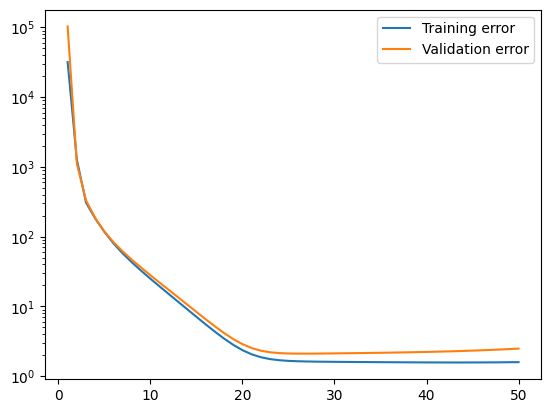

In [24]:
# %matplotlib notebook
import matplotlib.pyplot as plt

## Plot error during training
plt.figure()
plt.plot(epoch_arr, train_error, label="Training error")
plt.plot(epoch_arr, val_error, label="Validation error")
plt.yscale("log")
plt.legend()
plt.show()

The error decreases and stabilizes, as it should. Let us also look at how the output of the training data compares to the target after training.

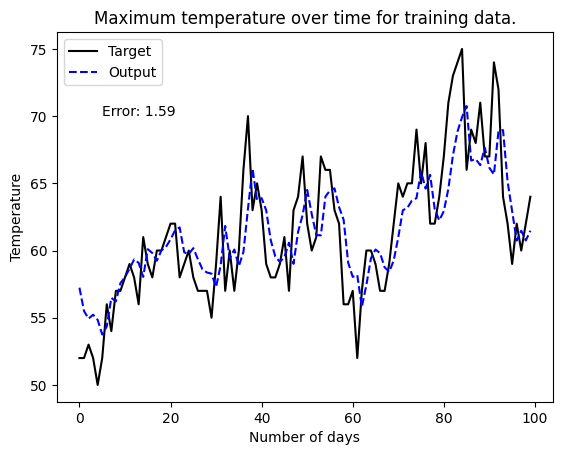

In [25]:
## Plot output and target after training
seq_ind = np.arange(N)
y = y_history[-1,0,:,0]
plt.figure()
plt.title("Maximum temperature over time for training data.")
plt.xlabel("Number of days")
plt.ylabel("Temperature")
plt.plot(seq_ind, t_orig, "k", label="Target")
plt.plot(seq_ind, y, "b--", label="Output")
plt.text(5, 70, f"Error: {train_error[-1]:.2f}")
plt.legend()
plt.show()

We do the same for the validation data as well.

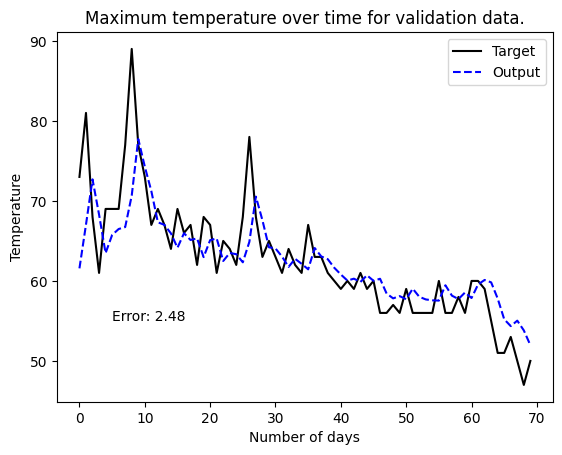

In [26]:
## Plot validation results
seq_val = np.arange(N_val)
y_val = y_val_history_scaled[-1,0,:,:]
y_val = sc.inverse_transform(y_val)
y_val = y_val[:,0]
plt.figure()
plt.title("Maximum temperature over time for validation data.")
plt.xlabel("Number of days")
plt.ylabel("Temperature")
plt.plot(seq_val, t_val_orig, "k", label="Target")
plt.plot(seq_val, y_val, "b--", label="Output")
plt.text(5, 55, f"Error: {val_error[-1]:.2f}")
plt.legend()
plt.show()

Both the training and validation output looks good, fitting the target relatively well considering that we are using a simple RNN. Let's see if the model can also extrapolate the output to get the temperature for the next $50$ days.

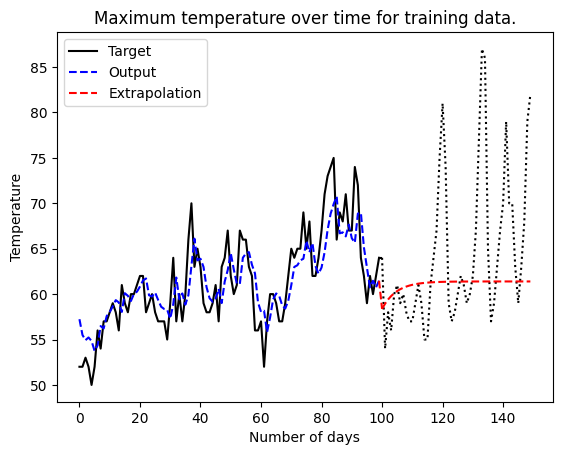

In [27]:
## Extrapolate data using network
length = 50
y_extra = rnn.extrapolate(length)
y_extra = y_extra[0,:,:]
y_extra = sc.inverse_transform(y_extra)
y_extra = y_extra[:,0]
seq_extra = np.arange(N, N+length)
t_extra = weather_data["tmax_tomorrow"][N:N+length].to_numpy()
plt.figure()
plt.title("Maximum temperature over time for training data.")
plt.xlabel("Number of days")
plt.ylabel("Temperature")
plt.plot(seq_ind, t_orig, "k", label="Target")
plt.plot(seq_extra, t_extra, "k:")
plt.plot([seq_ind[-1],seq_extra[0]], [t_orig[-1],t_extra[0]], "k--")
plt.plot(seq_ind, y, "b--", label="Output")
plt.plot([seq_ind[-1],seq_extra[0]], [y[-1],y_extra[0]], "r--")
plt.plot(seq_extra, y_extra, "r--", label="Extrapolation")
plt.legend()
plt.show()

The extrapolation does not look very good. It seems to stay constant, independent of the fluctuations in the true data.

We have stored the output from the network at each epoch. We can use this to create an animation of how the model fits to the data during training.

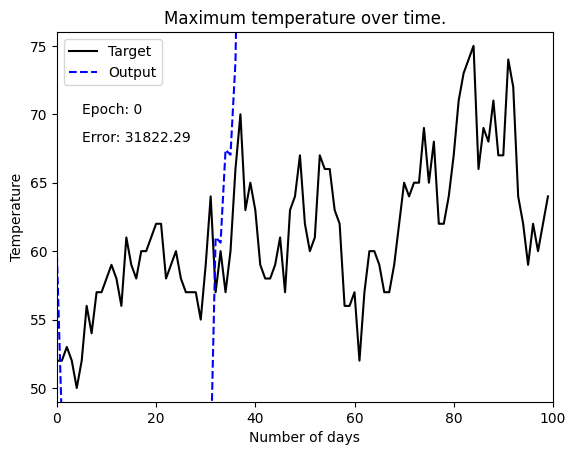

In [38]:
import matplotlib.animation as animation
from IPython.display import HTML
## Create animation of how the output fits to the target
y = y_history[0,0,:,0]
fig, ax = plt.subplots()
ax.set_title("Maximum temperature over time.")
ax.set_xlabel("Number of days")
ax.set_ylabel("Temperature")
t_plot = ax.plot(seq_ind, t_orig, "k", label="Target")[0]
y_plot = ax.plot(seq_ind, y, "b--", label="Output")[0]
epoch_text = ax.text(5, 70, f"Epoch: {0}")
error_text = ax.text(5, 68, f"Error: {train_error[0]:.2f}")
ax.set(xlim=[0,N], ylim=[np.min(t_orig)-1,np.max(t_orig)+1])
ax.legend()

def update_plot(frame):
    y = y_history[frame,0,:,0]
    y_plot.set_ydata(y)
    epoch_text.set_text(f"Epoch: {frame}")
    error_text.set_text(f"Error: {train_error[frame]:.2f}")
    return y_plot

anim = animation.FuncAnimation(fig=fig, func=update_plot, frames=epochs, interval=100)
HTML(anim.to_jshtml())

And we can do the same for the validation data.

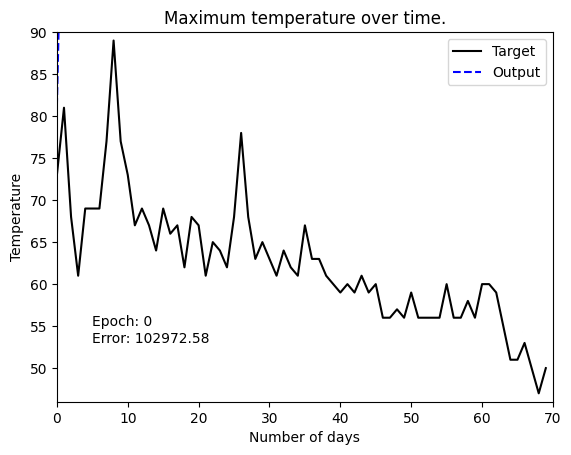

In [39]:
## Create animation for validation results
## Inversely scale output
y_val_history = np.zeros(y_val_history_scaled.shape)
for i in range(y_val_history_scaled.shape[0]):
    yi = y_val_history_scaled[i,0,:,:]
    yi_scaleback = sc.inverse_transform(yi)
    y_val_history[i,0,:,:] = yi_scaleback

y_val = y_val_history[0,0,:,0]
fig, ax = plt.subplots()
ax.set_title("Maximum temperature over time.")
ax.set_xlabel("Number of days")
ax.set_ylabel("Temperature")
t_plot = ax.plot(seq_val, t_val_orig, "k", label="Target")[0]
y_plot = ax.plot(seq_val, y_val, "b--", label="Output")[0]
epoch_text = ax.text(5, 55, f"Epoch: {0}")
error_text = ax.text(5, 53, f"Error: {val_error[0]:.2f}")
ax.set(xlim=[0,N_val], ylim=[np.min(t_val_orig)-1,np.max(t_val_orig)+1])
ax.legend()

def update_plot(frame):
    y_val = y_val_history[frame,0,:,0]
    y_plot.set_ydata(y_val)
    epoch_text.set_text(f"Epoch: {frame}")
    error_text.set_text(f"Error: {val_error[frame]:.2f}")
    return y_plot

anim = animation.FuncAnimation(fig=fig, func=update_plot, frames=epochs, interval=100)
HTML(anim.to_jshtml())